In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyclustertend import hopkins
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram



In [95]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [96]:
pcaData = pd.read_csv('./Data/PCAData.csv')
pcaData.drop(['PLAYER','TEAM'],axis=1,inplace=True)
pcaData.describe().round(1)

,PC1,PC2,PC3,PC4,PC5
count,397.0,397.0,397.0,397.0,397.0
mean,0.0,0.0,0.0,0.0,0.0
std,3.3,2.2,1.5,1.3,1.2
min,-5.8,-4.8,-3.6,-3.8,-3.5
25%,-2.4,-1.5,-1.1,-0.9,-0.6
50%,-0.6,-0.5,-0.1,0.0,-0.0
75%,1.5,0.9,1.1,0.8,0.4
max,12.2,9.0,4.6,3.9,13.0


In [97]:
# to standardise the principle components
scaler = StandardScaler()
pcaDataScaled = scaler.fit_transform(pcaData)

In [98]:
# check if components are standardised
pcaDataScaled = pd.DataFrame(pcaDataScaled, columns = ['PC1','PC2','PC3','PC4','PC5'])
pcaDataScaled.describe().round(1)

,PC1,PC2,PC3,PC4,PC5
count,397.0,397.0,397.0,397.0,397.0
mean,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.8,-2.2,-2.4,-2.9,-3.0
25%,-0.7,-0.7,-0.7,-0.7,-0.5
50%,-0.2,-0.2,-0.0,0.0,-0.0
75%,0.5,0.4,0.7,0.6,0.4
max,3.7,4.1,3.1,3.0,11.2


In [99]:
# conducting hopkins test
hopkins(pcaDataScaled,pcaDataScaled.shape[0])

0.19824876309380104

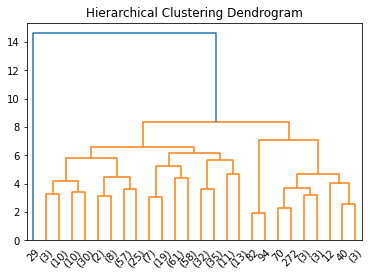

In [100]:
completeLinkage = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='complete')
completeLinknage = completeLinkage.fit(pcaDataScaled)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(completeLinkage, truncate_mode="level", p=5)
plt.show()

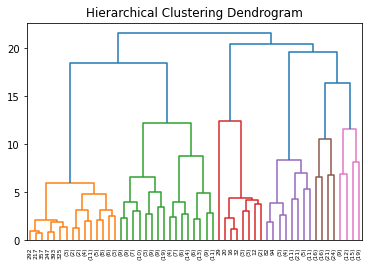

In [101]:
wardLinkage = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward')
wardLinkage = wardLinkage.fit(pcaDataScaled)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(wardLinkage, truncate_mode="level", p=5)
plt.show()

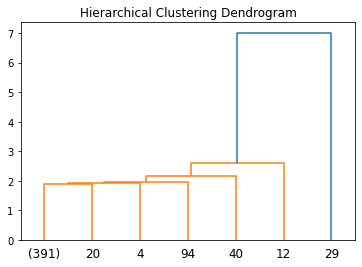

In [102]:
singleLinkage = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single')
singleLinkage = singleLinkage.fit(pcaDataScaled)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(singleLinkage, truncate_mode="level", p=5)
plt.show()

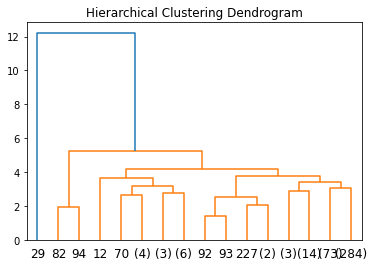

In [103]:
avgLinkage = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='average')
avgLinkage = avgLinkage.fit(pcaDataScaled)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(avgLinkage, truncate_mode="level", p=5)
plt.show()